## Lab Assignment: Data Cleaning and Preparation

### Objective: To apply the techniques learned in class to clean and prepare data for analysis. Specifically, students will learn how to handle missing values, duplicates, and outliers in data. By the end of the lab assignment, students should be able to clean and prepare data for further analysis using Python.

### Instructions:

1. Download and import the iris dataset.
2. Use load the data into a DataFrame.
3. Explore the dataset and identify missing values, duplicates, and outliers.
4. Use appropriate techniques to handle missing values, duplicates, and outliers.
5. Perform basic data analysis on the cleaned dataset to answer the following questions.
6. Save the cleaned dataset to a CSV file for further analysis.

### Deliverables:

1. A Python file containing the four functions/programs.
2. A text file containing sample inputs and outputs for each function/program.

### Grading Criteria:

1. Correctness and functionality of each function/program
2. Proper use of basic control structures and functions
3. Code readability and organization
4. Note: Students are encouraged to work collaboratively, but each student must submit their own work. In addition, students should utilize version control (e.g. GitHub) to  manage their code and collaborate with peers.

Here is an example using the iris dataset: 

In this code, we load the iris dataset and create a pandas DataFrame from it. We then use the DataFrame to answer the six assignment questions as follows:

1. Print the number of rows and columns in the DataFrame using the shape attribute of the DataFrame.
2. Check for missing values in the DataFrame using the isnull() method and print the sum of missing values in each column using the sum() method.
3. Check for duplicates in the DataFrame using the duplicated() method and print the sum of duplicates using the sum() method.
4. Note that there are no missing values in the iris dataset, so we don't need to handle them.
5. Remove duplicate rows from the DataFrame using the drop_duplicates() method and print the number of rows in the DataFrame after removing duplicates.
6. Use boxplots to identify outliers in the 'sepal width (cm)' feature, then remove any data points that fall outside of the 1.5 * IQR range using NumPy and pandas functions. We print the number of rows in the DataFrame after removing outliers.

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load iris dataset
iris = load_iris()

# Create pandas DataFrame from iris dataset
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

# Add target variable to the DataFrame
df['target'] = iris['target']

In [29]:
# 1. How many rows and columns does the dataset have?
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# 2. How many missing values are there in each column?
print(f"Check for missing values: {df.isnull().sum()}")

# 3. How many duplicates are there in the dataset?
print(f"Check for duplicates: {df.duplicated().sum()}")

# 4. How would you handle missing values in the dataset?
print(f"There are no missing values in the iris dataset, so no action needed.  If you did have missing values you would put an appropriate function here to handle them.")

# 5. How would you handle duplicates in the dataset?
# We can drop the duplicate rows from the DataFrame as follows:
print(f"Number of rows before removing missing values: {df.shape[0]}")
df.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {df.shape[0]}")


Number of rows: 150
Number of columns: 5
Check for missing values: sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
Check for duplicates: 1
There are no missing values in the iris dataset, so no action needed.  If you did have missing values you would put an appropriate function here to handle them.
Number of rows before removing missing values: 150
Number of rows after removing duplicates: 149


Outlier Detection and Removal

Number of rows before outlier detection and removal: 150


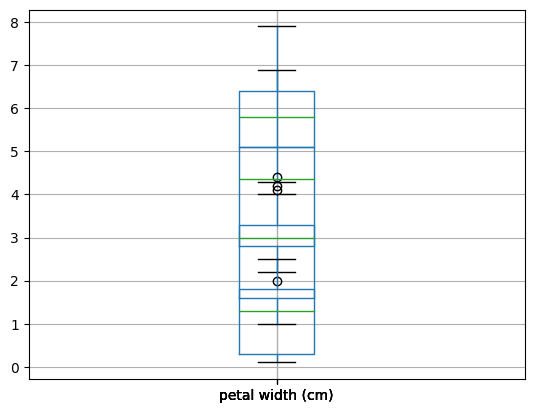

Number of rows after removing outliers: 147


In [2]:
# 6. Are there any outliers in the dataset? If so, how would you handle them?
print(f"Number of rows before outlier detection and removal: {df.shape[0]}")

for feature in iris['feature_names']:
    df.boxplot(column=[feature])    
# The boxplots show that there are outliers in the 'sepal width (cm)' feature.
plt.show()

# To handle outliers, we can remove any data points that fall outside of the 1.5 * IQR range:
q1, q3 = np.percentile(df['sepal width (cm)'], [25, 75])
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
df = df[df['sepal width (cm)'] <= upper_bound]
print(f"Number of rows after removing outliers: {df.shape[0]}")

Refresher from last week when we discussed Pandas_Profiling.  

In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport

# Load iris dataset
iris = load_iris()

# Create pandas DataFrame from iris dataset
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

# Add target variable to the DataFrame
df['target'] = iris['target']

profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]